In [1]:
# Perform imports and load the dataset:
import pandas as pd

In [4]:
df = pd.read_csv("Processed_Reviews.csv",encoding="ISO-8859-1")
df.shape

(13, 14)

In [6]:
# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 13 non-null     object
 1   lowercased             13 non-null     object
 2   urls_removed           13 non-null     object
 3   html_removed           13 non-null     object
 4   emojis_removed         13 non-null     object
 5   slangs_replaced        13 non-null     object
 6   contractions_replaced  13 non-null     object
 7   punctuations_removed   13 non-null     object
 8   numbers_removed        13 non-null     object
 9   spelling_corrected     13 non-null     object
 10  stopwords_removed      13 non-null     object
 11  stemmed_words          13 non-null     object
 12  lemmatized             13 non-null     object
 13  tokenized              13 non-null     object
dtypes: object(14)
memory usage: 1.6+ KB


(None,
                                               Review  \
 0  The product arrived on time. Packaging was gre...   
 1           THIS PRODUCT IS JUST AMAZING! I LOVE IT.   
 2  I bought this phone for $799, and it has a 120...   
 3  Wow!!! This product is awesome... but a bit ex...   
 4                The laptop works perfectly fine.      
 
                                           lowercased  \
 0  the product arrived on time. packaging was gre...   
 1           this product is just amazing! i love it.   
 2  i bought this phone for $799, and it has a 120...   
 3  wow!!! this product is awesome... but a bit ex...   
 4                the laptop works perfectly fine.      
 
                                         urls_removed  \
 0  the product arrived on time. packaging was gre...   
 1           this product is just amazing! i love it.   
 2  i bought this phone for $799, and it has a 120...   
 3  wow!!! this product is awesome... but a bit ex...   
 4                th

In [18]:
import numpy as np

# Define some simple positive and negative keywords
positive_keywords = ['great', 'amazing', 'love', 'perfect', 'awesome', 'worth', 'excellent']
negative_keywords = ['bad', 'worst', 'poor', 'disappointed', 'expensive', 'broke', 'terrible']

def label_review(text):
    text = text.lower()
    if any(word in text for word in positive_keywords):
        return 1
    elif any(word in text for word in negative_keywords):
        return 0
    else:
        return np.nan  # uncertain sentiment

# Apply labeling function to the lemmatized column
df['label'] = df['lemmatized'].apply(label_review)

# Display the number of labeled samples
df['label'].value_counts(dropna=False)

label
1.0    10
NaN     3
Name: count, dtype: int64

In [20]:
df_cleaned = df.dropna(subset=['label']).copy()

# Ensure labels are integers
df_cleaned['label'] = df_cleaned['label'].astype(int)

# Keep only the necessary columns for modeling
text_data = df_cleaned['lemmatized']
labels = df_cleaned['label']

# Show cleaned data shape
text_data.shape, labels.shape

((10,), (10,))

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)

# Show the shape of the feature matrix
X.shape

(10, 43)

In [28]:
y = labels

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [34]:
y_pred = model.predict(X_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


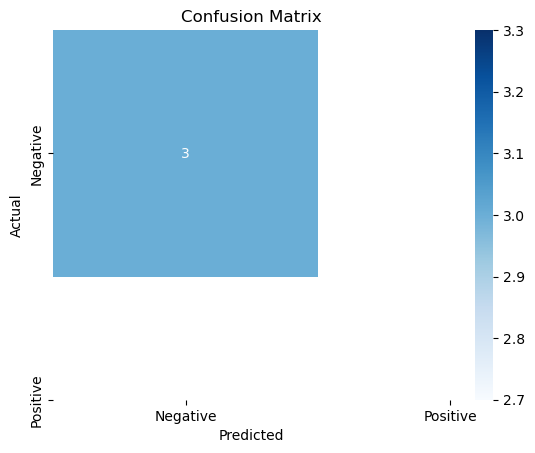

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()